# Predicted Peptides from Human non-coding RNA

* Analysis by: Chris Coletta
* Laboratory of Genetics and Gnomics
* National Institute on Aging
* May 5, 2017, modified Wed Sept 3

# Output format

```
From: Jon Hao [mailto:jon.hao@poochonscientific.com] 
Sent: Friday, August 25, 2017 2:16 PM
To: Aly, Kotb (NIH/NIA/IRP) [E] <abdelmohsenk@grc.nia.nih.gov>
Cc: Munk, Rachel (NIH/NIA) [E] <munkr@grc.nia.nih.gov>
Subject: RE: ncRNA project
 
Hi Kotb,
 
I tried the short peptides Database from predicated non-coding RNA. It does not work due to no unique ID for each entry. An unique ID need to be added to each entry. The file too big so that I cannot add the unique IDs using excel. But I made an example for your IT collaborator reference. for example, replace the “>” with “>gi|10000001|SP|10000001|”. Please let me know if you want to setup a teleconference call to discuss this.
 
Thanks,
 
Jon
```

# Load some helper packages

In [1]:
import time
from collections import Counter

# Peak at the first few lines of the input file

In [2]:
!head HG19_en82_nc.fa

>ENST00000003607$$ENST00000003607
GGGACTGGGGCGGAACCGCCCGGCCGCGGGTCGGGCTCTGTGTCAGCAGC
CGGGCGGGCGCTCGGGCGGGACATGGCAGCCTGTACAGCCCGGCGGCCCC
TGGCCGTGGGCAGCCGCTGGTGGTCCCGGTCGCTGACTGGGGCCCGGTGG
CAAAGCCGCTCTGTGCGGCGGCCGGAGCTGGAGCCTTCTCGCCAGCGTCG
ACCACGACGACGCGGAGGCACCTCTCGTCCCGAAACCGACCAGAGGGCAA
AGTGTTGGAGACAGTTGGTGTGTTTGAGGTGCCAAAACAGAATGGAAAAT
ATGAGACCGGGCAGCTTTTCCTTCATAGCATTTTTGGCTACCGAGGTGTC
GTCCTGTTTCCCTGGCAGGCCAGACTGTATGACCGGGATGTGGCTTCTGC
AGCTCCAGAAAAAGCAGAGAACCCTGCTGGCCATGGCTCCAAGGAGGTGA


# Load Biopython packages

In [3]:
from Bio.SeqIO.FastaIO import SimpleFastaParser
from Bio.Seq import translate, reverse_complement

# Compile a Regular Expression to search for peptides

In [4]:
import regex
finder = regex.compile(r"M\w*\*", overlapped=True)

# Search!

In [17]:
# use translation table 1 for human
genetic_code = 1
label_str = ">gi|1{_id}|SP|1{_id}|{title} UNIQUE PREDICTED PEPTIDES {direction} Frame {orf}\n"
infile = open("HG19_en82_nc.fa")
outfile = open( "HG19_en82_nc_PREDICTED_PEPTIDES_UNIQUE.fa", 'w')
t0 = time.time()
all_peptides_count = 0
unique_peptides = set()
peptide_counter = Counter()
peptide_length_counter = Counter()
nucleotide_length_counter = Counter()
for seqcount, (title, seq) in enumerate( SimpleFastaParser( infile ) ):   
    length = len(seq)
    nucleotide_length_counter[ length ] += 1
    pepcount = 0
    direction = "5'-3'"
    for i in range(0, 3):
        id_str = str( ( seqcount*6) + i + 1 ).zfill(7) 
        outfile.write( label_str.format( _id=id_str, title=title, direction=direction, orf=i+1 ) )
        fragment_length = 3 * ( (length - i) // 3 ) 
        tr = translate( seq[ i:i + fragment_length ], genetic_code )
        for m in finder.finditer( str( tr ), overlapped=True ):
            pep = m.group()[:-1]
            peptide_counter[ pep ] += 1
            peptide_length_counter[ len(pep) ] += 1
            if pep not in unique_peptides:
                unique_peptides.add( pep )
                outfile.write( pep + '\n' )
            pepcount += 1
    anti = reverse_complement( seq )
    direction = "3'-5'"
    for i in range(0, 3):
        id_str = str( ( seqcount*6) +3 + i + 1 ).zfill(7) 
        outfile.write( label_str.format( _id=id_str, title=title, direction=direction, orf=i+1 ) )
        fragment_length = 3 * ((length - i) // 3)
        tr = translate( anti[ i:i + fragment_length], genetic_code)
        for m in finder.finditer( str( tr ), overlapped=True ):
            pep = m.group()[:-1]
            peptide_counter[ pep ] += 1
            peptide_length_counter[ len(pep) ] += 1
            if pep not in unique_peptides:
                unique_peptides.add( pep )
                outfile.write( pep + '\n' )
            pepcount += 1
    t = time.time()
    #print( "Seq {} Pep {} Time {:0.2f}\t{}".format( 
    #    str(seqcount).zfill(6), str(pepcount).zfill(3), (t-t0)/60, title ) )
    all_peptides_count += pepcount
    
print( "FINISHED. {} seq, {} total pep {} unique in {:0.2f} minutes".format( 
    seqcount, all_peptides_count, len(unique_peptides), (t-t0)/60 ) )

infile.close()
outfile.close()

FINISHED. 114608 seq, 3291389 total pep 1919225 unique in 3.10 minutes


In [19]:
!head -30 HG19_en82_nc_PREDICTED_PEPTIDES_UNIQUE.fa

>gi|10000001|SP|10000001|ENST00000003607$$ENST00000003607 UNIQUE PREDICTED PEPTIDES 5'-3' Frame 1
MAACTARRPLAVGSRWWSRSLTGARWQSRSVRRPELEPSRQRRPRRRGGTSRPETDQRAKCWRQLVCLRCQNRMENMRPGSFSFIAFLATEVSSCFPGRPDCMTGMWLLQLQKKQRTLLAMAPRR
MENMRPGSFSFIAFLATEVSSCFPGRPDCMTGMWLLQLQKKQRTLLAMAPRR
MRPGSFSFIAFLATEVSSCFPGRPDCMTGMWLLQLQKKQRTLLAMAPRR
MTGMWLLQLQKKQRTLLAMAPRR
MWLLQLQKKQRTLLAMAPRR
MAPRR
MLVTAHIYLRDLRQKL
MMTVGPSMPSQAWTMSAMKTSSPTPPLIRFPSNMNSLKDFFCMTRQKHLLLWLGRR
MTVGPSMPSQAWTMSAMKTSSPTPPLIRFPSNMNSLKDFFCMTRQKHLLLWLGRR
MPSQAWTMSAMKTSSPTPPLIRFPSNMNSLKDFFCMTRQKHLLLWLGRR
MSAMKTSSPTPPLIRFPSNMNSLKDFFCMTRQKHLLLWLGRR
MKTSSPTPPLIRFPSNMNSLKDFFCMTRQKHLLLWLGRR
MNSLKDFFCMTRQKHLLLWLGRR
MTRQKHLLLWLGRR
MFIGKQLRTYVSLSSPSTWA
MWYSSGSGTGGYSVSLAPWRQCEAEG
MAPTLMFGFLPSPWKAIKMRRHHPQAFTGRPAEAPSAQAWSPGRTTLIPQLLQNSSLPIMGHSGSLNLIVGFFLWGGVV
MFGFLPSPWKAIKMRRHHPQAFTGRPAEAPSAQAWSPGRTTLIPQLLQNSSLPIMGHSGSLNLIVGFFLWGGVV
MRRHHPQAFTGRPAEAPSAQAWSPGRTTLIPQLLQNSSLPIMGHSGSLNLIVGFFLWGGVV
MGHSGSLNLIVGFFLWGGVV
MWDTSKAGLLISPAYTMFQ
MFQ
MCLFPSQPGG

# Create Peptide length Histogram
## Load graphics packages

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [8]:
pep_lengths = [ l for l, p in peptide_length_counter.most_common() for i in range(p) ]

## Make figure

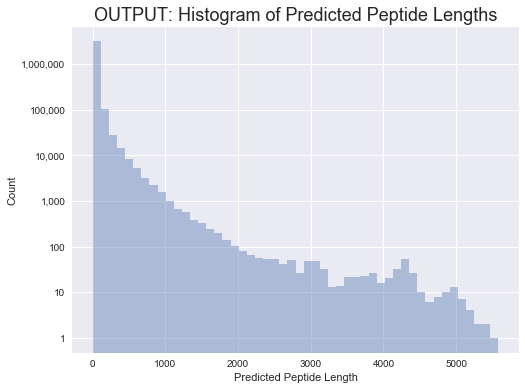

In [9]:
fig, ax = plt.subplots( figsize=(8, 6))
grid = sns.distplot( pep_lengths, kde=False, ax=ax )
#grid.set( yscale="log")
ax.set_title( "OUTPUT: Histogram of Predicted Peptide Lengths", size=18)
ax.set_xlabel( "Predicted Peptide Length")
ax.set_ylabel( "Count")
ax.set_yscale('log')
ax.set_yticks( [1,10,100, 1000, 10000, 100000, 1000000] )
ax.set_yticklabels( ['1','10','100', '1,000', '10,000', '100,000', '1,000,000'])

# Save figure

In [10]:
fig.savefig( "output.pdf")

# Make Input Nucleotide Length Histogram

In [11]:
nt_lengths = [ l for l, p in nucleotide_length_counter.most_common() for i in range(p) ]

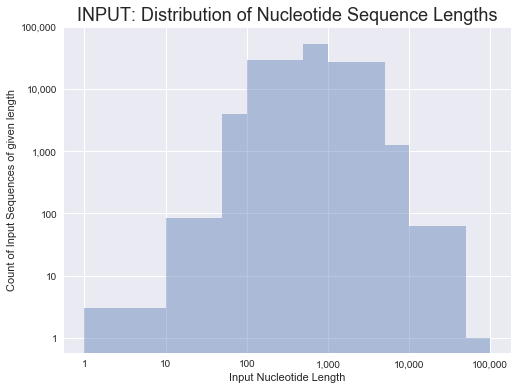

In [12]:
fig, ax = plt.subplots( figsize=(8, 6))
bins = [0, 1,10,50,100, 500, 1000, 5000, 10000, 50000, 100000]
grid = sns.distplot( nt_lengths, kde=False, ax=ax, bins=bins)
grid.set( yscale="log")
grid.set( xscale="log")
ax.set_xlabel( "Input Nucleotide Length")
ax.set_ylabel( "Count of Input Sequences of given length")
ax.set_title( "INPUT: Distribution of Nucleotide Sequence Lengths", size=18)
ax.set_yticks( [1,10,100, 1000, 10000, 100000] )
ax.set_yticklabels( ['1','10','100', '1,000', '10,000', '100,000'])
ax.set_xticks( [1,10,100, 1000, 10000, 100000] )
ax.set_xticklabels( ['1','10','100', '1,000', '10,000', '100,000'])

In [13]:
fig.savefig('input.pdf')

# Look for motifs in the most commonly predicted peptides

Greater then 5 AA

The motif <code>ML*R*VS*S</code> shows up in the top scorers 7 times.

In [15]:
for pep, count in peptide_counter.most_common():
    if len(pep) > 5 and count > 100:
        print( count, pep )

915 MLARLVSNS
695 MVKPHLY
676 MVKPRLY
516 MVKPCLY
470 MLARLVLNS
294 MLARMVSIS
265 MLVRLVSNS
264 MLRKCR
232 MLRKGW
188 MLGLQA
164 MLPRLVSNS
138 MLIFSVSFQF
136 MAKPHLY
135 MAPAQG
124 MAKPRLY
120 MEKPRLY
113 MPVIPAL
110 MAKPCLY
107 MLPRLVLNS
101 MLVRLVLNS
